In [2]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [3]:
df = pd.read_csv("data/products.csv", index_col="id")
df.drop("url", inplace=True, axis=1)
df.category = df.category.astype("category")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19626 entries, 1 to 20268
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   category          19626 non-null  category
 1   title             19626 non-null  object  
 2   price             19626 non-null  int64   
 3   brand             19556 non-null  object  
 4   rating            19626 non-null  int64   
 5   reviews_quantity  19626 non-null  int64   
dtypes: category(1), int64(3), object(2)
memory usage: 939.9+ KB


In [5]:
category_counts = df.groupby(df.category)["title"].count()

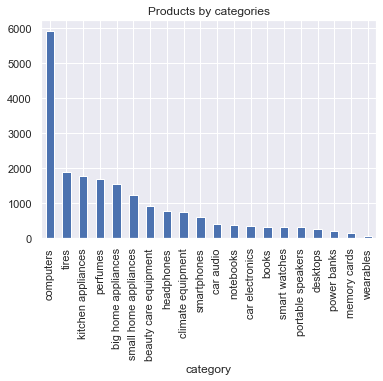

In [9]:
category_counts.sort_values(ascending=False).plot.bar(title="Products by categories")

Text(0.5, 1.0, 'Price distribution')

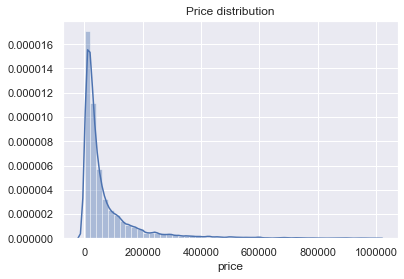

In [11]:
sns.distplot(df.price).set_title("Price distribution")

Text(0.5, 1.0, 'Computers Price Distribution')

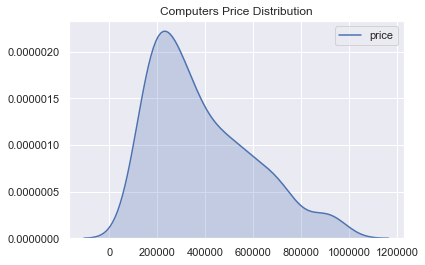

In [13]:
sns.kdeplot(df[df.category.isin(['dekstops', 'notebooks'])].price, shade=True).set_title("Computers Price Distribution")

Text(0.5, 1.0, 'Smartphones Price Distribution')

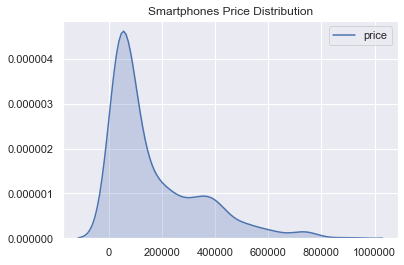

In [14]:
sns.kdeplot(df[df.category == 'smartphones'].price, shade=True).set_title("Smartphones Price Distribution")

In [16]:
rated_products = df[df.reviews_quantity > 0]
category_ratings = rated_products.groupby(rated_products.category)["rating"].mean().sort_values()

Text(0.5, 1.0, 'Average Rating by Category')

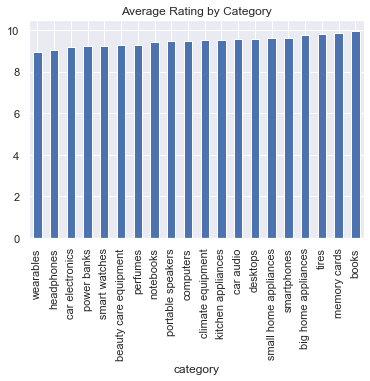

In [17]:
category_ratings.plot.bar().set_title("Average Rating by Category")

In [54]:
rated_computers = rated_products[rated_products.category.isin(["notebooks", "desktops", "smartphones", "wearables", "headphones"])]
computer_ratings = rated_computers.groupby(rated_computers.category)["rating"].mean().sort_values(ascending=False)

[Text(0, 0.5, 'Rating'), Text(0.5, 0, 'Computer Related Category')]

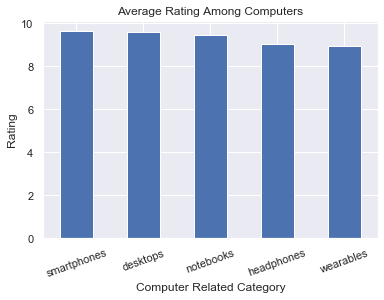

In [81]:
computer_ratings_plot = computer_ratings[:5].plot.bar()
computer_ratings_plot.set_title("Average Rating Among Computers")
computer_ratings_plot.set_xticklabels(computer_ratings.index, rotation=20)
computer_ratings_plot.set(xlabel="Computer Related Category", ylabel="Rating")

In [58]:
ratings_count = rated_products.rating.value_counts().reindex(range(1, 11), fill_value=0)

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Rating')]

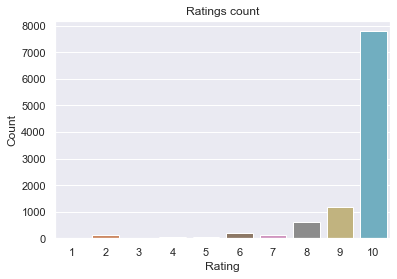

In [83]:
ratings_count_plot = sns.barplot(x=ratings_count.index, y=ratings_count.values)
ratings_count_plot.set_title("Ratings count")
ratings_count_plot.set(xlabel="Rating", ylabel="Count")

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Rating')]

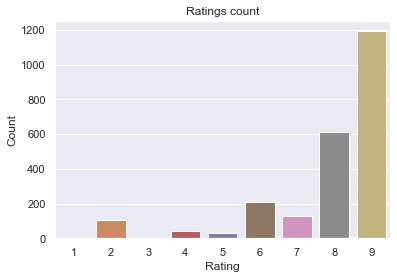

In [84]:
ratings_count_plot = sns.barplot(x=ratings_count.index[:-1], y=ratings_count.values[:-1])
ratings_count_plot.set_title("Ratings count")
ratings_count_plot.set(xlabel="Rating", ylabel="Count")

In [85]:
smartphones = df[df.category == "smartphones"]

In [86]:
smartphones.brand.unique()

array(['OPPO', 'Samsung', 'Apple', 'Xiaomi', 'Huawei', 'Vivo', 'Meizu',
       'Lenovo', 'TP-LINK', 'OnePlus', 'Nokia', 'Realme', 'Honor', 'BQ',
       'ZTE', 'TECNO', 'Prestigio', 'HTC', 'Google', 'Sony', 'Fly',
       'INOI', 'Gionee', 'DOOGEE', 'Haier', 'Jinga', 'teXet', 'LeEco',
       'Irbis', nan, 'Philips'], dtype=object)

In [87]:
POPULAR_BRANDS = ['OPPO', 'Samsung', 'Apple', 'Xiaomi', 'Huawei', 'Meizu', 'OnePlus', 'HTC']

In [88]:
smartphones = smartphones[(smartphones.brand.isin(POPULAR_BRANDS)) & (smartphones.reviews_quantity >= 10)]

In [89]:
smartphones

,category,title,price,brand,rating,reviews_quantity
id,,,,,,
17560,smartphones,OPPO A1k красный,48888,OPPO,10,122
17457,smartphones,Samsung Galaxy A10s 2/32Gb черный,55900,Samsung,10,771
17458,smartphones,Samsung Galaxy A20s 32Gb черный,65690,Samsung,10,588
17459,smartphones,Samsung Galaxy A51 4/64Gb Черный,108900,Samsung,10,320
17460,smartphones,Samsung Galaxy A51 6/128Gb Черный,120187,Samsung,10,230
...,...,...,...,...,...,...
17972,smartphones,Huawei Y5 2017 черный-серый,49800,Huawei,10,108
17978,smartphones,Huawei Ascend P9 Lite VNS-L21 золотистый,69990,Huawei,10,61
18035,smartphones,Huawei Y5 Lite 2018 DRA-LX5 1Gb черный,34700,Huawei,9,34


[Text(0, 0, 'OPPO'),
 Text(0, 0, 'Samsung'),
 Text(0, 0, 'Apple'),
 Text(0, 0, 'Xiaomi'),
 Text(0, 0, 'Huawei'),
 Text(0, 0, 'Meizu'),
 Text(0, 0, 'OnePlus'),
 Text(0, 0, 'HTC')]

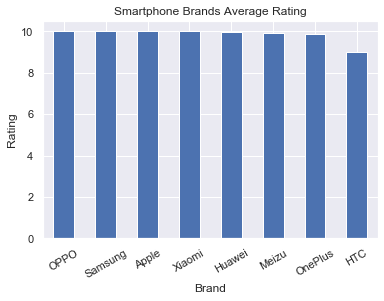

In [94]:
brands_rating = smartphones.groupby(smartphones.brand)["rating"].mean().sort_values(ascending=False).plot.bar()
brands_rating.set_title("Smartphone Brands Average Rating")
brands_rating.set(xlabel="Brand", ylabel="Rating")
brands_rating.set_xticklabels(POPULAR_BRANDS, rotation=30)

In [96]:
smartphones.sort_values(by="reviews_quantity", ascending=False)[:10]

,category,title,price,brand,rating,reviews_quantity
id,,,,,,
17465,smartphones,Samsung Galaxy A10 черный,51217,Samsung,10,2074
17490,smartphones,Samsung Galaxy A50 4/64Gb черный,106500,Samsung,10,1887
17641,smartphones,Apple iPhone 6 32 Gb серый космос,159990,Apple,10,1866
17462,smartphones,Apple iPhone 7 32Gb черный,168000,Apple,10,1644
17467,smartphones,Samsung Galaxy A50 6/128Gb черный,104600,Samsung,10,1066
17464,smartphones,Xiaomi Redmi Note 8 4/64Gb Neptune синий,73880,Xiaomi,10,1022
17457,smartphones,Samsung Galaxy A10s 2/32Gb черный,55900,Samsung,10,771
17761,smartphones,Samsung Galaxy A7 SM-A750 2018 черный,97750,Samsung,10,768
17485,smartphones,Samsung Galaxy A10 красный,51390,Samsung,10,635


[Text(0.5, 0, 'Brand')]

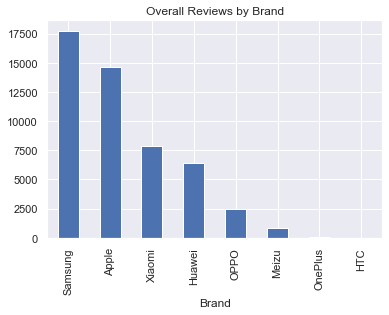

In [105]:
smartphones_reviews_count = smartphones.groupby(smartphones.brand)["reviews_quantity"].sum().sort_values(ascending=False).plot.bar()
smartphones_reviews_count.set_title("Overall Reviews by Brand")
smartphones_reviews_count.set(xlabel="Brand")

[Text(0.5, 0, 'Brand')]

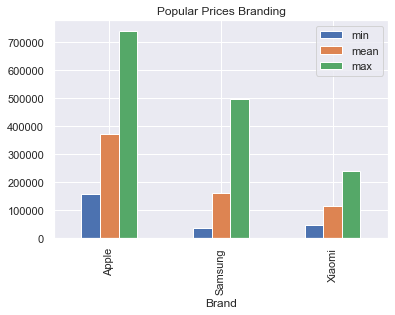

In [106]:
poplar_brands_pricing = smartphones[smartphones.brand.isin(['Apple', 'Xiaomi', 'Samsung'])].groupby(smartphones.brand)["price"].agg(["min", "mean", "max"]).plot.bar()
poplar_brands_pricing.set_title("Popular Prices Branding")
poplar_brands_pricing.set(xlabel="Brand")

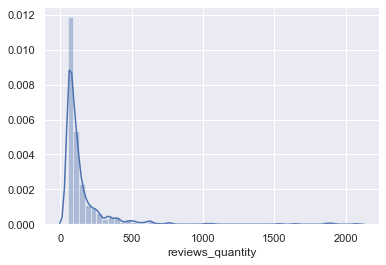

In [70]:
sns.distplot(df[df.reviews_quantity > 50].reviews_quantity)

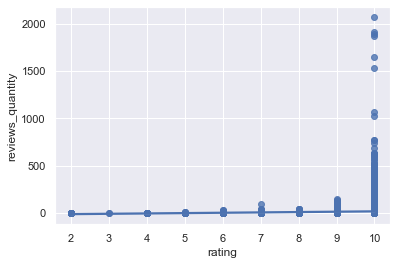

In [71]:
sns.regplot(rated_products.rating, rated_products.reviews_quantity)

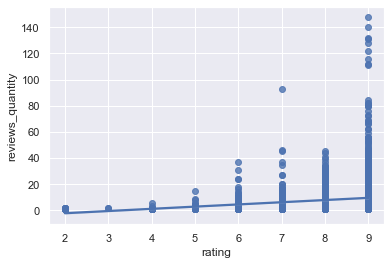

In [72]:
sns.regplot(rated_products[rated_products.rating < 10].rating, rated_products[rated_products.rating < 10].reviews_quantity)